# Classify and predict whether or not the borrower paid back their loan in full



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

In [2]:
df=pd.read_csv("/content/loan_data.csv")

In [3]:
df.head()

credit.policy             purpose  ...  pub.rec  not.fully.paid
0              1  debt_consolidation  ...        0               0
1              1         credit_card  ...        0               0
2              1  debt_consolidation  ...        0               0
3              1  debt_consolidation  ...        0               0
4              1         credit_card  ...        0               0

[5 rows x 14 columns]

In [4]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

# ***Columns Details***

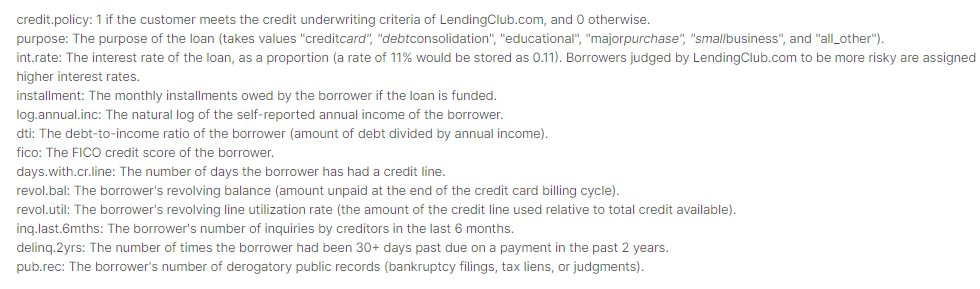

In [5]:
df.describe()

credit.policy     int.rate  ...      pub.rec  not.fully.paid
count    9578.000000  9578.000000  ...  9578.000000     9578.000000
mean        0.804970     0.122640  ...     0.062122        0.160054
std         0.396245     0.026847  ...     0.262126        0.366676
min         0.000000     0.060000  ...     0.000000        0.000000
25%         1.000000     0.103900  ...     0.000000        0.000000
50%         1.000000     0.122100  ...     0.000000        0.000000
75%         1.000000     0.140700  ...     0.000000        0.000000
max         1.000000     0.216400  ...     5.000000        1.000000

[8 rows x 13 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.shape

(9578, 14)

In [8]:
df['credit.policy'].nunique()

2

In [9]:
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [10]:
df['purpose'].nunique()

7

In [11]:
df['purpose'].describe()

count                   9578
unique                     7
top       debt_consolidation
freq                    3957
Name: purpose, dtype: object

In [12]:
df.groupby(['purpose']).mean()

credit.policy  int.rate  ...   pub.rec  not.fully.paid
purpose                                      ...                          
all_other                0.787216  0.116771  ...  0.048048        0.166023
credit_card              0.808241  0.119738  ...  0.072108        0.115689
debt_consolidation       0.814506  0.126595  ...  0.070508        0.152388
educational              0.740525  0.119907  ...  0.043732        0.201166
home_improvement         0.813990  0.117507  ...  0.066773        0.170111
major_purchase           0.848970  0.114171  ...  0.048055        0.112128
small_business           0.799677  0.138087  ...  0.056543        0.277868

[7 rows x 13 columns]

In [13]:
df.groupby('not.fully.paid').sum()

credit.policy  int.rate  ...  delinq.2yrs  pub.rec
not.fully.paid                           ...                      
0                        6696  971.5972  ...         1300      455
1                        1014  203.0493  ...          268      140

[2 rows x 12 columns]

In [14]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [15]:
df.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
l_encoding =LabelEncoder()

In [17]:
df['purpose']=l_encoding.fit_transform(df['purpose'])

In [18]:
df['purpose']

0       2
1       1
2       2
3       2
4       1
       ..
9573    0
9574    0
9575    2
9576    4
9577    2
Name: purpose, Length: 9578, dtype: int64

In [19]:
df['purpose'].unique()

array([2, 1, 0, 4, 6, 5, 3])

In [20]:
df.head()

credit.policy  purpose  int.rate  ...  delinq.2yrs  pub.rec  not.fully.paid
0              1        2    0.1189  ...            0        0               0
1              1        1    0.1071  ...            0        0               0
2              1        2    0.1357  ...            0        0               0
3              1        2    0.1008  ...            0        0               0
4              1        1    0.1426  ...            1        0               0

[5 rows x 14 columns]

In [21]:
df['not.fully.paid'].unique()

array([0, 1])

In [22]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

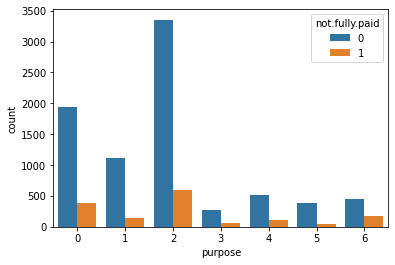

In [23]:
sns.countplot(x='purpose',data=df,hue='not.fully.paid')

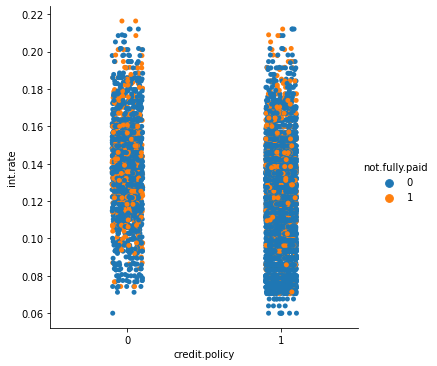

In [24]:
sns.catplot(x='credit.policy',y='int.rate',data=df,hue='not.fully.paid')
sns.set_style('darkgrid')

In [25]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

<Figure size 720x360 with 0 Axes>

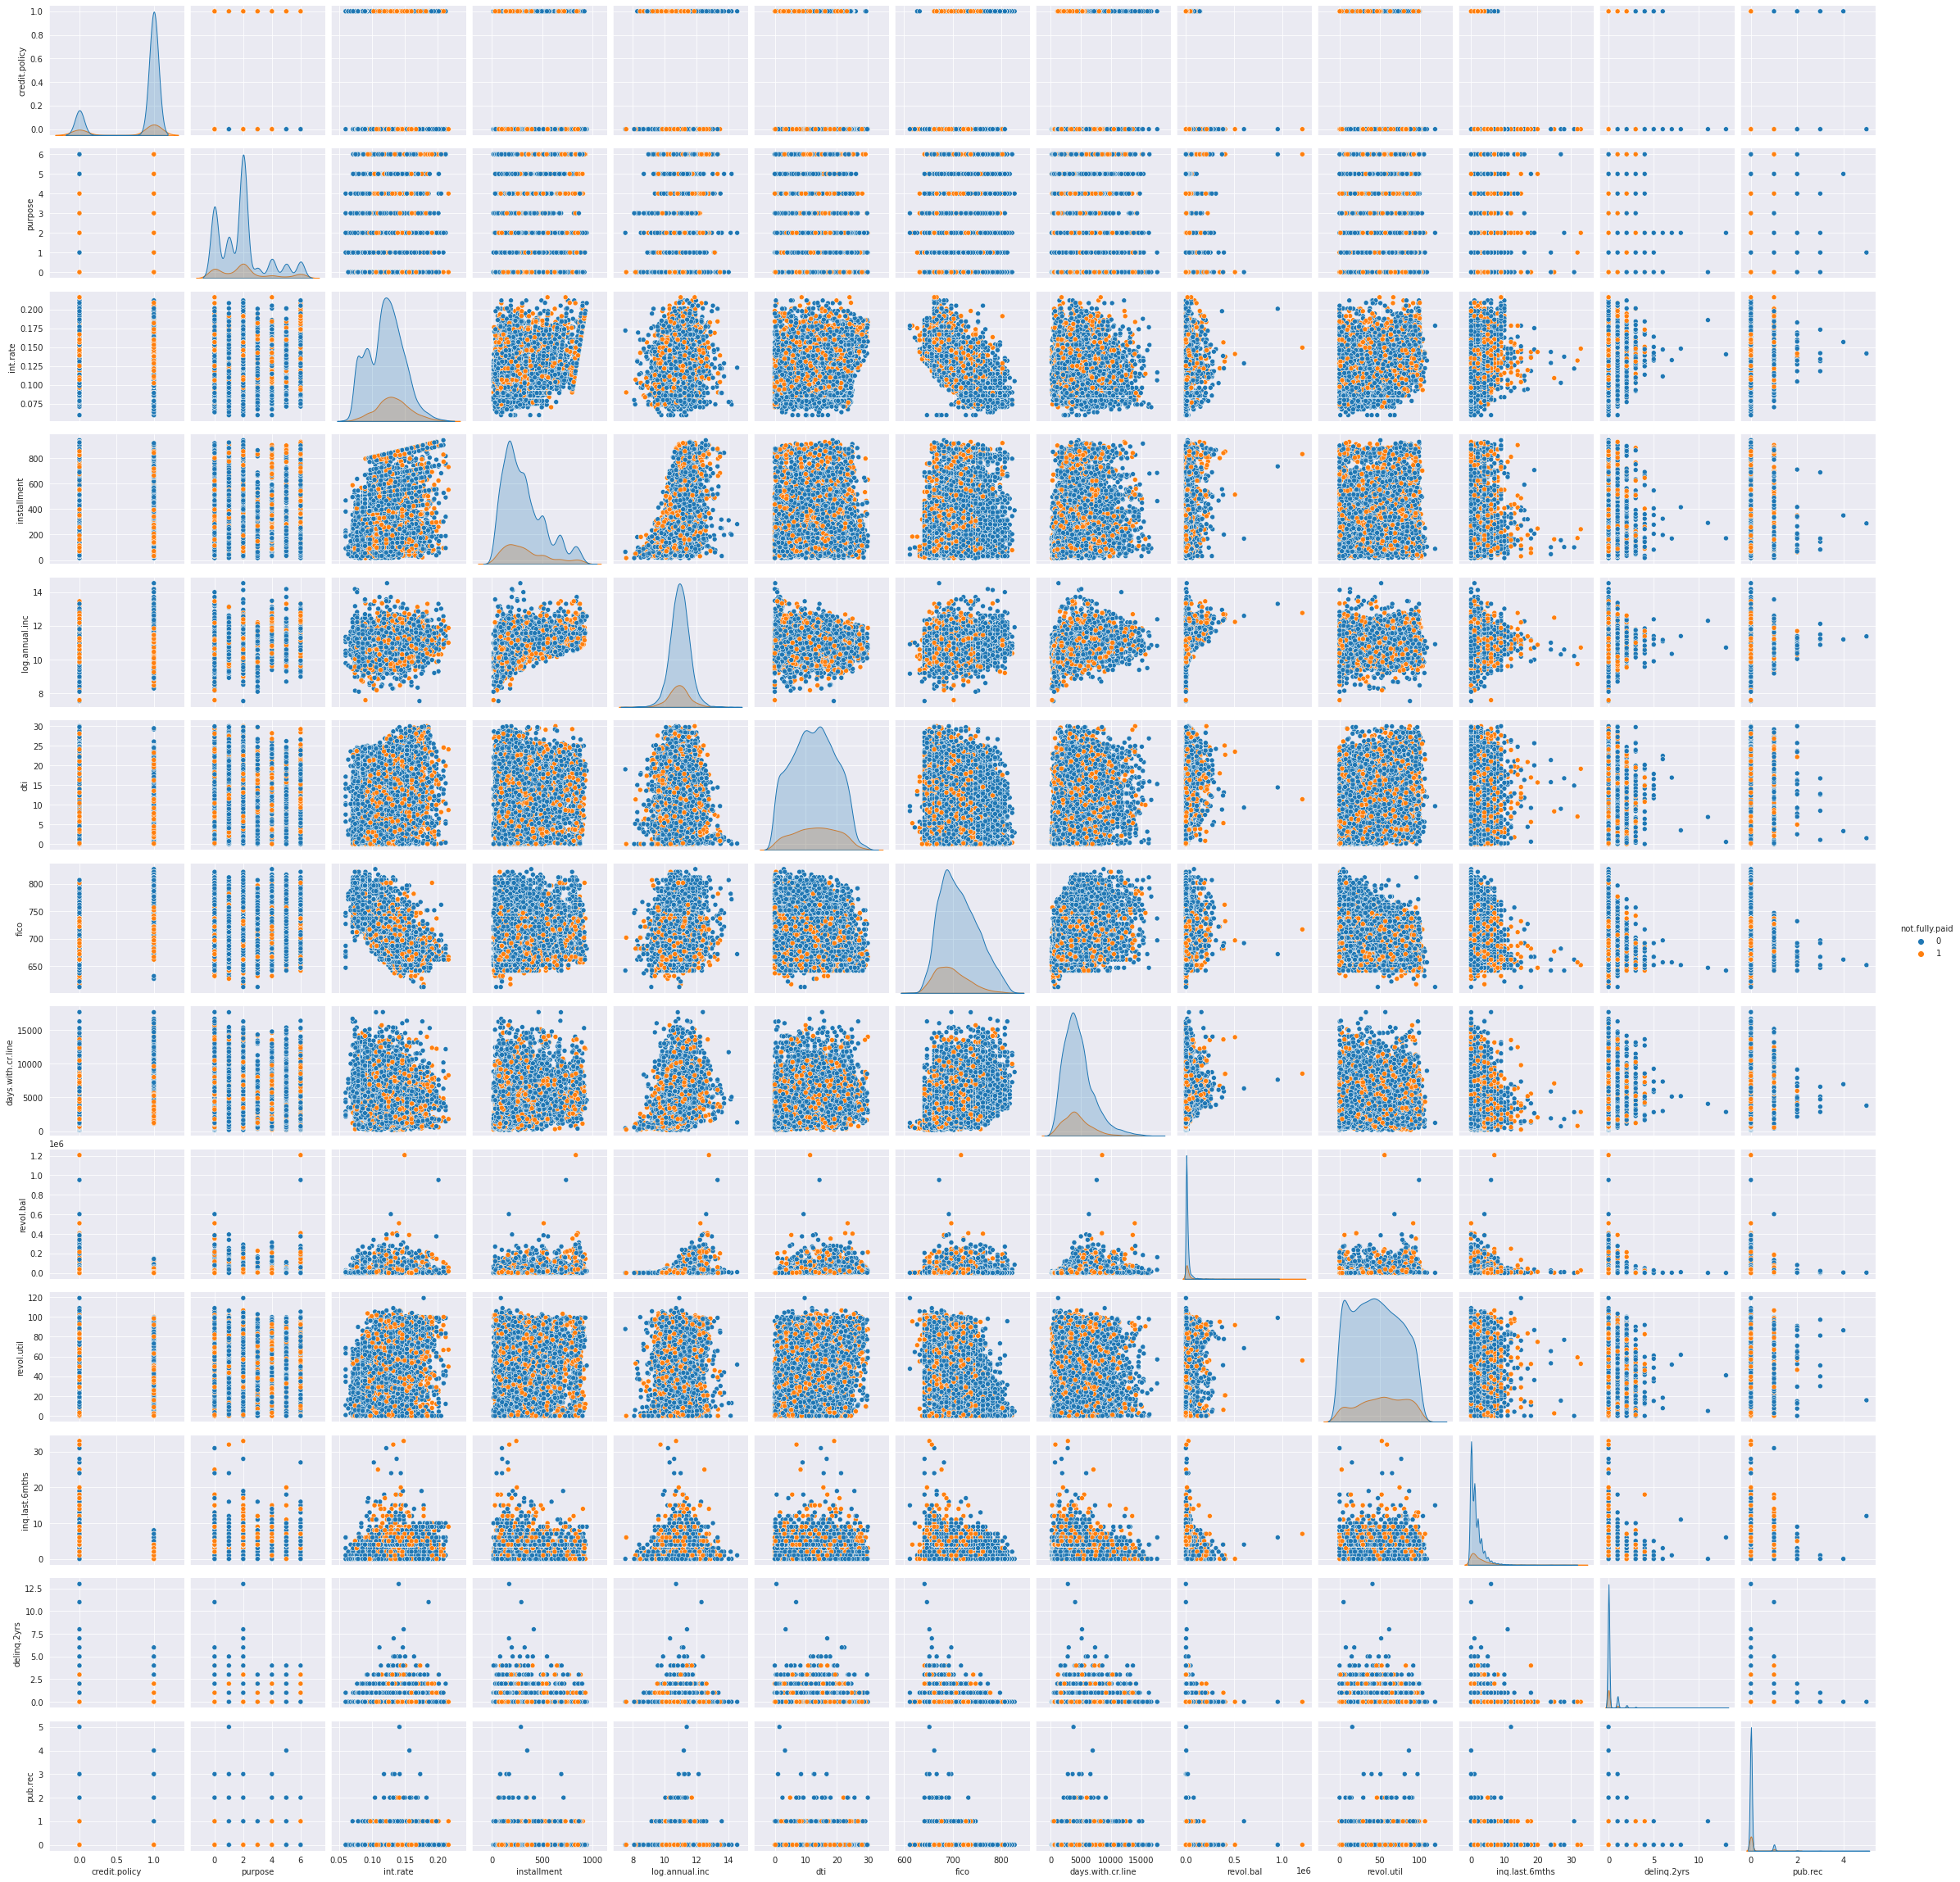

In [26]:
plt.figure(figsize=(10,5))
sns.pairplot(df ,hue='not.fully.paid')

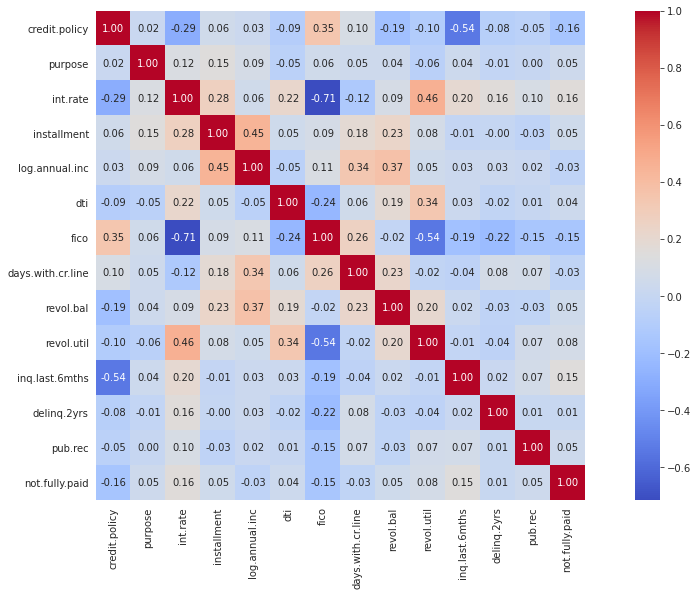

In [27]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10},cmap='coolwarm')

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

In [29]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [30]:
Scaler =StandardScaler()
X=Scaler.fit_transform(X)

In [31]:
X.shape

(9578, 13)

In [32]:
y.shape

(9578,)

In [33]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=0)

In [34]:
print(X_train[5])
print(X_train.shape)

[-2.03160257  0.03317632  0.8031093  -1.34177897  0.25669385  0.27359498
 -1.02311806 -1.12975295 -0.48064699 -1.37867061  2.01012208 -0.29973008
 -0.23700318]
(6704, 13)


In [35]:
print(X_test[5])
print(X_test.shape)

[ 0.49222226  0.03317632 -0.16166757 -1.06094317 -0.46633256  0.2692368
 -0.36467847 -0.58904418 -0.31453545  1.03404906 -0.26247044 -0.29973008
 -0.23700318]
(2874, 13)


# ***LogisticRegression***

In [36]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred=model.predict(X_test)

In [38]:
print("Accuracy_Score :",metrics.accuracy_score(y_test,y_pred))
print('Confusion_MatriX :\n',metrics.confusion_matrix(y_test,y_pred))
print('Classification_Report :',metrics.classification_report(y_test,y_pred))

Accuracy_Score : 0.8333333333333334
Confusion_MatriX :
 [[2392   14]
 [ 465    3]]
Classification_Report :               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2406
           1       0.18      0.01      0.01       468

    accuracy                           0.83      2874
   macro avg       0.51      0.50      0.46      2874
weighted avg       0.73      0.83      0.76      2874



# ***KNN***

In [39]:
model1=KNeighborsClassifier()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)

In [40]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred1))
print('Confusion_MatriX :\n',metrics.confusion_matrix(y_test,y_pred1))
print('Classification_Report :\n',metrics.classification_report(y_test,y_pred1))

Accuracy_Score : 0.8180236604036186
Confusion_MatriX :
 [[2324   82]
 [ 441   27]]
Classification_Report :
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      2406
           1       0.25      0.06      0.09       468

    accuracy                           0.82      2874
   macro avg       0.54      0.51      0.50      2874
weighted avg       0.74      0.82      0.77      2874



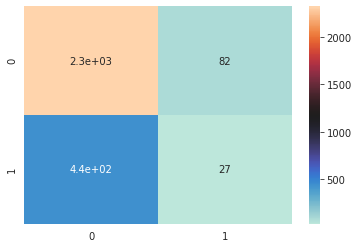

In [41]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred1),annot=True,cmap='icefire')

In [42]:
error_rate=[]
for i in range(1,30):
  model_i=KNeighborsClassifier(n_neighbors=i)
  model_i.fit(X_train,y_train)
  pred_i=model_i.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

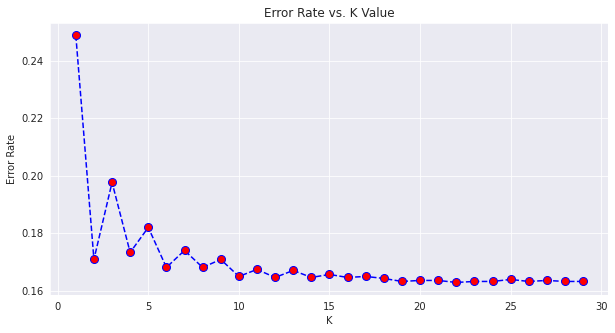

In [43]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [44]:
model_i=KNeighborsClassifier(n_neighbors=30)
model_i.fit(X_train,y_train)
y_pred_knn=model_i.predict(X_test)

In [45]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred_knn))
print('Confusion_MatriX :\n',metrics.confusion_matrix(y_test,y_pred_knn))
print('Classification_Report :\n',metrics.classification_report(y_test,y_pred_knn))

Accuracy_Score : 0.8364648573416841
Confusion_MatriX :
 [[2404    2]
 [ 468    0]]
Classification_Report :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2406
           1       0.00      0.00      0.00       468

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874



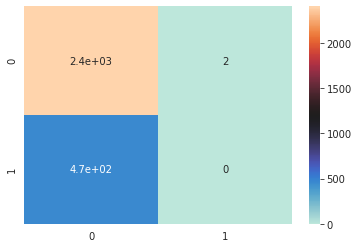

In [46]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_knn),annot=True,cmap='icefire')

# *Implemeting Using PIPELINE*

In [47]:
pipe_LR=Pipeline([('scaler1',StandardScaler()),
                 ('LR',LogisticRegression())])
pipe_SVC=Pipeline([('scaler2',StandardScaler()),
                    ('SVR',SVC())])
pipe_DT=Pipeline([('scaler3',StandardScaler()),
                  ('DTR',DecisionTreeClassifier())])
pipe_RF=Pipeline([('scaler4',StandardScaler()),
                  ('RFR',RandomForestClassifier())])
pipe_Knn=Pipeline([('scaler5',StandardScaler()),
                   ('Knn',KNeighborsClassifier(n_neighbors=30))])

In [48]:
pipeline1=[pipe_LR,pipe_SVC,pipe_DT,pipe_RF,pipe_Knn]

In [49]:
pipe_dict={0:'LogisticRegression',1:'KNeighborsClassifier',2:'SVC',3:'DecisionTreeClassifier',4:'RandomForestClassifier'}

In [50]:
for pipe in pipeline1:
  pipe.fit(X_train,y_train)

In [51]:
for i,models in enumerate(pipeline1):
  print("{} Accuracy : {}".format(pipe_dict[i],models.score(X_test,y_test)))

LogisticRegression Accuracy : 0.8333333333333334
KNeighborsClassifier Accuracy : 0.837160751565762
SVC Accuracy : 0.7393876130828114
DecisionTreeClassifier Accuracy : 0.8357689631176062
RandomForestClassifier Accuracy : 0.8364648573416841


KNeighborsClassifier BEST_CLASSIFICATION_ALGORITM as per our dataset
# ACCURACY_SCORE:**0.837160751565762**